# Real-Time Natural Gas Price Tracking from DataHub.io
#### (Analysis by Muhammad Azammuddin bin Suratem)

## Codes by DataHub.io
Python codes to load the real-time data online (codes provided by DataHub.io)

Link to the source code: https://datahub.io/core/natural-gas#pandas

Real-time data tracking guided by US Energy Information Administration (EIA): https://www.eia.gov/naturalgas/weekly/#tabs-prices-1

#### Step 1
Install required library `datapackage` to run this real time data lirary via online

In [1]:
!pip install datapackage

#### Step 2
Import the required libraries `datapackage` and `pandas` from the installed libraries using Python command `import` 

In [2]:
import datapackage
import pandas as pd

#### Step 3
Load the real-time data from the given link/URL into a local storage

In [3]:
data_url = 'https://datahub.io/core/natural-gas/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

#### Step 4
Load the tabulated data using Pandas command `pd.read_csv()`

In [4]:
# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

            Date  Price
0     1997-01-07   3.82
1     1997-01-08   3.80
2     1997-01-09   3.61
3     1997-01-10   3.92
4     1997-01-13   4.00
...          ...    ...
5948  2020-08-26   2.52
5949  2020-08-27   2.52
5950  2020-08-28   2.46
5951  2020-08-31   2.30
5952  2020-09-01   2.22

[5953 rows x 2 columns]
       Month  Price
0    1997-01   3.45
1    1997-02   2.15
2    1997-03   1.89
3    1997-04   2.03
4    1997-05   2.25
..       ...    ...
279  2020-04   1.74
280  2020-05   1.75
281  2020-06   1.63
282  2020-07   1.77
283  2020-08   2.30

[284 rows x 2 columns]
Empty DataFrame
Columns: [[{"Date": "1997-01-07",  "Price": 3.82}, {"Date": "1997-01-08",  "Price": 3.8}, {"Date": "1997-01-09",  "Price": 3.61}, {"Date": "1997-01-10",  "Price": 3.92}, {"Date": "1997-01-13",  "Price": 4.0}, {"Date": "1997-01-14",  "Price": 4.01}, {"Date": "1997-01-15",  "Price": 4.34}, {"Date": "1997-01-16",  "Price": 4.71}, {"Date": "1997-01-17",  "Price": 3.91}, {"Date": "1997-01-20",  "Price": 3.26}

## Codes for Data Analysis

Codes for data analysis are courtesy of: Muhammad Azammuddin bin Suratem (@azamsuratem on GitHub)

### Checking the data contents
using `.head(12)` and `.tail(12)` for the first and last 12 months of the data 

In [11]:
data.head(12)

,Month,Price
0,1997-01,3.45
1,1997-02,2.15
2,1997-03,1.89
3,1997-04,2.03
4,1997-05,2.25
5,1997-06,2.20
6,1997-07,2.19
7,1997-08,2.49
8,1997-09,2.88
9,1997-10,3.07


In [13]:
data.tail(8)

,Month,Price
276,2020-01,2.02
277,2020-02,1.91
278,2020-03,1.79
279,2020-04,1.74
280,2020-05,1.75
281,2020-06,1.63
282,2020-07,1.77
283,2020-08,2.30


### Summary on the data structure
using `.info()` to show the lists of columns and the data types (Dtypes) for each column

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   284 non-null    object 
 1   Price   284 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


### Importing necessary libraries for data analysis
including `Numpy` and `Pandas` to work with the data analysis, and `Matplotlib` and `Seaborn` for data visualization

In [15]:
import numpy as np
import math 

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use('default')

from scipy.stats import iqr

### Plot real-time gold prices
using `Seaborn`'s `relplot()` with `kind='line'` for line graph based on "Year" as timeline

<b>Tips:</b> Run <b>"Part 1"</b> in the following <b>Data Analysis</b> section to correct the x-axis "Year"

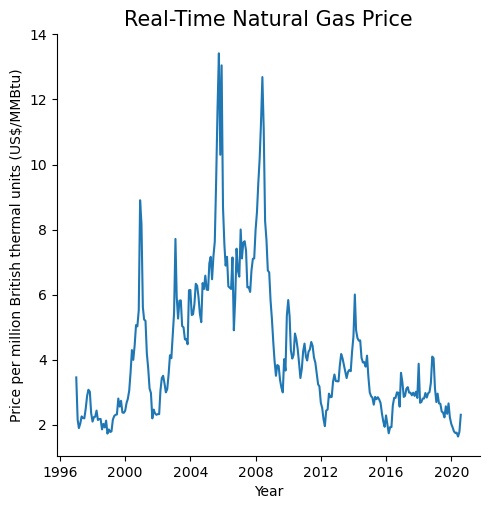

In [36]:
sns.relplot(data=data, x='Month', y='Price', kind='line', ci=None)
plt.xlabel("Year")
plt.ylabel("Price per million British thermal units (US$/MMBtu)")
plt.title("Real-Time Natural Gas Price", fontsize=15)
plt.show()

### Data Analysis: Fluctuations of Natural Gas Prices over the Years

#### Part 1: Converting "Date" from 'object' to 'datetime' Dtype

In [24]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   284 non-null    datetime64[ns]
 1   Price   284 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


#### Part 2: Applying descriptive statistics for the data analysis
including:
- <u>measures of <b>central tendency</b></u> using <b>Mean</b> and <b>Median</b>, and
- <u>measures of <b>dispersion</b></u> using <b>Standard Deviation (SD)</b>, <b>Upper Fence</b> and <b>Lower Fence</b>

In [25]:
mean_ng_year = round(data.groupby(data['Month'].dt.year)['Price'].mean(),3)
median_ng_year = round(data.groupby(data['Month'].dt.year)['Price'].median(),3)
sd_ng_year = round(data.groupby(data['Month'].dt.year)['Price'].apply(np.std),3)

q1_ng_year = round(data.groupby(data['Month'].dt.year)['Price'].quantile(q=.25),3)
q3_ng_year = round(data.groupby(data['Month'].dt.year)['Price'].quantile(q=.75),3)
iqr_ng_year = round(data.groupby(data['Month'].dt.year)['Price'].apply(iqr),3)

uf_ng_year = round((q3_ng_year + (1.5*iqr_ng_year)),3)
lf_ng_year = round((q1_ng_year - (1.5*iqr_ng_year)),3)

mean_ng_year

Month
1997    2.497
1998    2.091
1999    2.270
2000    4.309
2001    3.957
2002    3.367
2003    5.486
2004    5.900
2005    8.812
2006    6.745
2007    6.977
2008    8.862
2009    3.948
2010    4.387
2011    4.000
2012    2.752
2013    3.728
2014    4.392
2015    2.630
2016    2.515
2017    2.986
2018    3.167
2019    2.566
2020    1.864
Name: Price, dtype: float64

In [28]:
temp_mean = mean_ng_year.astype('str')
temp_sd = sd_ng_year.astype('str')

ng_year = temp_mean.str.cat(temp_sd, sep=" ± ").to_frame().rename(columns={"Price":"Mean ± SD (US$/MMBtu)"})
ng_year["Median (US$/MMBtu)"] = median_ng_year
ng_year["Lower Fence (US$/MMBtu)"] = lf_ng_year
ng_year["Upper Fence (US$/MMBtu)"] = uf_ng_year

ng_year

,Mean ± SD (US$/MMBtu),Median (US$/MMBtu),Lower Fence (US$/MMBtu),Upper Fence (US$/MMBtu)
Month,,,,
1997,2.497 ± 0.467,2.300,1.081,4.012
1998,2.091 ± 0.184,2.130,1.705,2.473
1999,2.27 ± 0.324,2.305,1.565,2.925
2000,4.309 ± 1.694,4.140,-0.100,8.108
2001,3.957 ± 1.736,3.415,-1.725,9.355
2002,3.367 ± 0.678,3.345,2.042,4.651
2003,5.486 ± 0.856,5.345,3.480,7.268
2004,5.9 ± 0.456,6.035,4.085,7.605
2005,8.812 ± 2.59,7.405,1.099,16.400


#### Part 3: Plotting the "Lower Fence", "Median" and "Upper Fence"
to <b>show the deviations</b> of the natural gas prices <b>over the years</b>

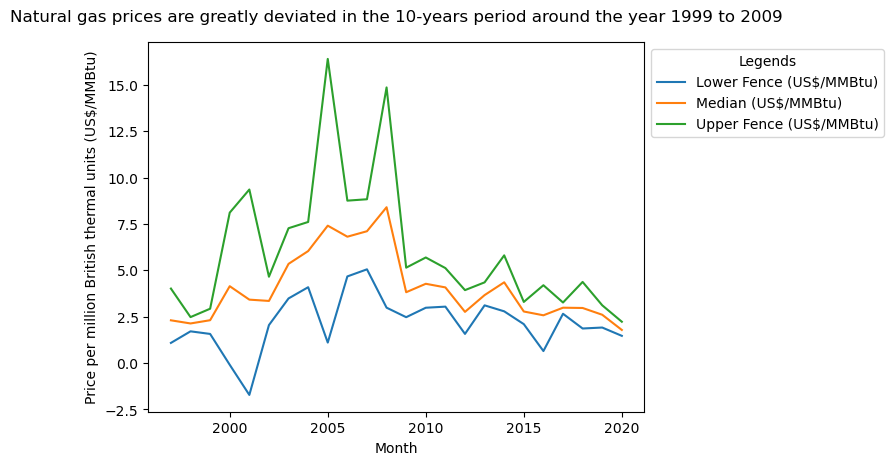

In [35]:
ng_year.plot(y=["Lower Fence (US$/MMBtu)","Median (US$/MMBtu)","Upper Fence (US$/MMBtu)"], kind='line')
plt.title("Natural gas prices are greatly deviated in the 10-years period around the year 1999 to 2009", fontsize=12, pad=15)
plt.ylabel("Price per million British thermal units (US$/MMBtu)")
plt.legend(title="Legends", bbox_to_anchor=(1,1), loc="upper left")
plt.show()

### Further Data Analysis: Fluctuation Trends of Natural Gas Prices across the Months

Repeat <b>"Part 2"</b> and <b>"Part 3"</b> from the <b>Data Analysis</b> section before by using the `.dt.month` option for the Pandas `.groupby()` command

In [37]:
mean_ng_month = round(data.groupby(data['Month'].dt.month)['Price'].mean(),3)
median_ng_month = round(data.groupby(data['Month'].dt.month)['Price'].median(),3)
sd_ng_month = round(data.groupby(data['Month'].dt.month)['Price'].apply(np.std),3)

q1_ng_month = round(data.groupby(data['Month'].dt.month)['Price'].quantile(q=.25),3)
q3_ng_month = round(data.groupby(data['Month'].dt.month)['Price'].quantile(q=.75),3)
iqr_ng_month = round(data.groupby(data['Month'].dt.month)['Price'].apply(iqr),3)

uf_ng_month = round((q3_ng_month + (1.5*iqr_ng_month)),3)
lf_ng_month = round((q1_ng_month - (1.5*iqr_ng_month)),3)

mean_ng_month

Month
1     4.379
2     4.200
3     4.026
4     4.113
5     4.172
6     4.285
7     4.062
8     4.035
9     4.077
10    4.289
11    4.253
12    4.618
Name: Price, dtype: float64

In [38]:
temp_mean = mean_ng_month.astype('str')
temp_sd = sd_ng_month.astype('str')

ng_month = temp_mean.str.cat(temp_sd, sep=" ± ").to_frame().rename(columns={"Price":"Mean ± SD (US$/MMBtu)"})
ng_month["Median (US$/MMBtu)"] = median_ng_month
ng_month["Lower Fence (US$/MMBtu)"] = lf_ng_month
ng_month["Upper Fence (US$/MMBtu)"] = uf_ng_month

ng_month

,Mean ± SD (US$/MMBtu),Median (US$/MMBtu),Lower Fence (US$/MMBtu),Upper Fence (US$/MMBtu)
Month,,,,
1,4.379 ± 2.047,3.660,-2.342,10.858
2,4.2 ± 2.144,3.100,-2.405,10.574
3,4.026 ± 2.019,3.420,-1.463,9.310
4,4.113 ± 2.123,3.465,-1.398,9.170
5,4.172 ± 2.169,3.710,-0.863,8.337
6,4.285 ± 2.38,3.760,-1.188,8.800
7,4.062 ± 2.082,3.245,-0.027,7.584
8,4.035 ± 1.943,3.115,0.183,7.203
9,4.077 ± 2.101,3.550,0.022,7.602


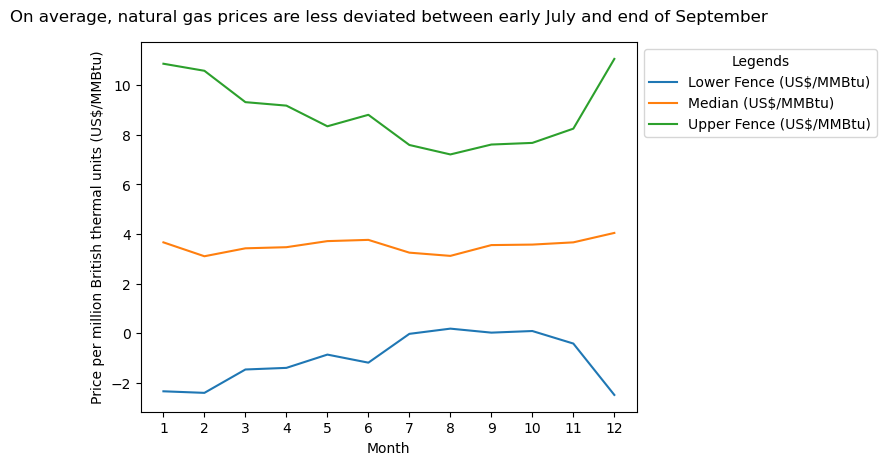

In [44]:
ng_month.plot(y=["Lower Fence (US$/MMBtu)","Median (US$/MMBtu)","Upper Fence (US$/MMBtu)"], kind='line')
plt.title("On average, natural gas prices are less deviated between early July and end of September", fontsize=12, pad=15)
plt.ylabel("Price per million British thermal units (US$/MMBtu)")
plt.legend(title="Legends", bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(np.arange(1,13,1))
plt.show()